In [1]:
from tensorflow import keras
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_dir = r"E:/project 1/train_images"

In [3]:
datagenerator = {
    "train": ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1. / 255, validation_split=0.1, shear_range=0.1, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, rotation_range=30,).flow_from_directory(directory=data_dir, target_size=(256, 256), subset='training',), "valid": ImageDataGenerator(rescale=1 / 255, validation_split=0.1, ).flow_from_directory(directory=data_dir, target_size=(256, 256), subset='validation', ), }

Found 9371 images belonging to 10 classes.
Found 1036 images belonging to 10 classes.


In [4]:
model = Sequential([
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding="same"),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding="same"),
    Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding="same"),
    Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding="same"),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Adjust the output layer to match your number of classes
])


In [5]:
opt = optimizers.Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

In [6]:
batch_size = 32
epochs = 30
train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]

filepath = "./alexnet_model_{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator,
    callbacks=callbacks_list
)

Epoch 1/30
293/293 [==============================] - ETA: 0s - loss: 2.1141 - accuracy: 0.2166
Epoch 1: val_accuracy improved from -inf to 0.33205, saving model to .\alexnet_model_01-0.33.h5
293/293 [==============================] - 643s 2s/step - loss: 2.1141 - accuracy: 0.2166 - val_loss: 1.8866 - val_accuracy: 0.3320
Epoch 2/30
293/293 [==============================] - ETA: 0s - loss: 1.8508 - accuracy: 0.3510
Epoch 2: val_accuracy improved from 0.33205 to 0.39479, saving model to .\alexnet_model_02-0.39.h5
293/293 [==============================] - 594s 2s/step - loss: 1.8508 - accuracy: 0.3510 - val_loss: 1.7372 - val_accuracy: 0.3948
Epoch 3/30
293/293 [==============================] - ETA: 0s - loss: 1.7117 - accuracy: 0.4026
Epoch 3: val_accuracy improved from 0.39479 to 0.41699, saving model to .\alexnet_model_03-0.42.h5
293/293 [==============================] - 588s 2s/step - loss: 1.7117 - accuracy: 0.4026 - val_loss: 1.6711 - val_accuracy: 0.4170
Epoch 4/30
293/293 [==

In [7]:
model.save('alexnet_final_model.h5')

In [2]:
# Importing Libraries
from tensorflow import keras
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image

import pickle
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Base Path for all files

data_dir = r"E:/project 1/train_images"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagenerator = {
    "train": ImageDataGenerator(horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1. / 255,
                                validation_split=0.1,
                                shear_range=0.1,
                                zoom_range=0.1,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rotation_range=30
                               ).flow_from_directory(directory=data_dir,
                                                     target_size=(256, 256),
                                                     subset='training',
                                                    ),

    "valid": ImageDataGenerator(rescale=1. / 255,
                                validation_split=0.1
                               ).flow_from_directory(directory=data_dir,
                                                     target_size=(256, 256),
                                                     subset='validation',
                                                    )
}


Found 9371 images belonging to 10 classes.
Found 1036 images belonging to 10 classes.


In [5]:
# Initializing pretrained model
base_model = MobileNetV2(weights=None, include_top=False, input_shape=(256, 256, 3))

# Load Weights
base_model.load_weights('./mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_192_no_top.h5')

# Setting the Training of all layers of InceptionV3 model to false
base_model.trainable = False

In [6]:
# Adding some more layers at the end of the Model as per our requirement
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.15),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax') # 10 Output Neurons for 10 Classes
])

In [7]:
# Using the Adam Optimizer to set the learning rate of our final model
opt = optimizers.Adam(learning_rate=0.0001)

# Compiling and setting the parameters we want our model to use
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [8]:
# Viewing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_256 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,579,978
Trainable params: 1,321,994
Non-

In [10]:
# Setting variables for the model
batch_size = 32
epochs = 40

# Seperating Training and Testing Data
train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]

In [11]:
# Calculating variables for the model
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 292
validation_steps : 32


In [12]:
# File Path to store the trained models
filepath = "./model_{epoch:02d}-{val_accuracy:.2f}.h5"

# Using the ModelCheckpoint function to train and store all the best models
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint1]
# Training the Model
history = model.fit_generator(generator=train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,
                              validation_data=valid_generator, validation_steps=validation_steps,
                              callbacks=callbacks_list)

Epoch 1/40
292/292 [==============================] - ETA: 0s - loss: 1.7184 - accuracy: 0.4116
Epoch 1: val_accuracy improved from -inf to 0.45020, saving model to .\model_01-0.45.h5
292/292 [==============================] - 409s 1s/step - loss: 1.7184 - accuracy: 0.4116 - val_loss: 1.5793 - val_accuracy: 0.4502
Epoch 2/40
292/292 [==============================] - ETA: 0s - loss: 1.4287 - accuracy: 0.5162
Epoch 2: val_accuracy improved from 0.45020 to 0.50293, saving model to .\model_02-0.50.h5
292/292 [==============================] - 610s 2s/step - loss: 1.4287 - accuracy: 0.5162 - val_loss: 1.4184 - val_accuracy: 0.5029
Epoch 3/40
292/292 [==============================] - ETA: 0s - loss: 1.3203 - accuracy: 0.5629
Epoch 3: val_accuracy improved from 0.50293 to 0.58496, saving model to .\model_03-0.58.h5
292/292 [==============================] - 579s 2s/step - loss: 1.3203 - accuracy: 0.5629 - val_loss: 1.2604 - val_accuracy: 0.5850
Epoch 4/40
292/292 [==========================

In [17]:
# Check our folder and import the model with best validation accuracy
loaded_best_model = keras.models.load_model("./model_38-0.75.h5")


In [4]:
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import os

# Load the pre-trained models
model1 = load_model('alexnet_final_model.h5')  # Expecting 227x227 input
model2 = load_model('./model_38-0.75.h5')     # Expecting 256x256 input

# Create feature extractor models for both models
feature_extractor1 = Model(inputs=model1.input, outputs=model1.layers[-2].output)
feature_extractor2 = Model(inputs=model2.input, outputs=model2.layers[-2].output)

# Path to dataset
data_dir = r'E:/project 1/train_images'

# Get the class names
class_names = os.listdir(data_dir)

# Initialize lists to store features and labels
features = []
labels = []

# Function to extract and combine features from both models
def extract_features(img_path):
    # Load and preprocess the image for model1
    img1 = image.load_img(img_path, target_size=(227, 227))
    img1_array = image.img_to_array(img1)
    img1_array = np.expand_dims(img1_array, axis=0) / 255.0  # Normalize

    # Load and preprocess the image for model2
    img2 = image.load_img(img_path, target_size=(256, 256))  # Adjusted to 256x256
    img2_array = image.img_to_array(img2)
    img2_array = np.expand_dims(img2_array, axis=0) / 255.0  # Normalize

    # Extract features from both models
    features1 = feature_extractor1.predict(img1_array)
    features2 = feature_extractor2.predict(img2_array)

    # Combine features (e.g., concatenate)
    combined_features = np.concatenate((features1, features2), axis=-1)
    return combined_features

# Loop through each class folder and extract features
for class_name in class_names:
    class_folder = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        # Extract features from the image
        try:
            img_features = extract_features(img_path)
            features.append(img_features.flatten())  # Flatten the feature vector
            labels.append(class_name)  # Append the label (class name)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

# Convert lists to numpy arrays
X = np.array(features)
y = np.array(labels)

# Encode class labels as integers
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----------- SVM Classifier -------------
svm_classifier = SVC(kernel='linear')  # Linear kernel SVM
svm_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# ----------- KNN Classifier -------------
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate KNN model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

# ----------- KSVM Classifier (SVM with RBF Kernel) -------------
ksvm_classifier = SVC(kernel='rbf')  # RBF kernel SVM
ksvm_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_ksvm = ksvm_classifier.predict(X_test)

# Evaluate KSVM model
ksvm_accuracy = accuracy_score(y_test, y_pred_ksvm)
print(f"KSVM (RBF) Accuracy: {ksvm_accuracy:.4f}")


1/1 [==============================] - 0s 396ms/step
SVM Accuracy: 0.9750
KNN Accuracy: 0.9606
KSVM (RBF) Accuracy: 0.9741


In [5]:
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"KSVM Accuracy: {ksvm_accuracy:.4f}")


SVM Accuracy: 0.9750
KNN Accuracy: 0.9606
KSVM Accuracy: 0.9741


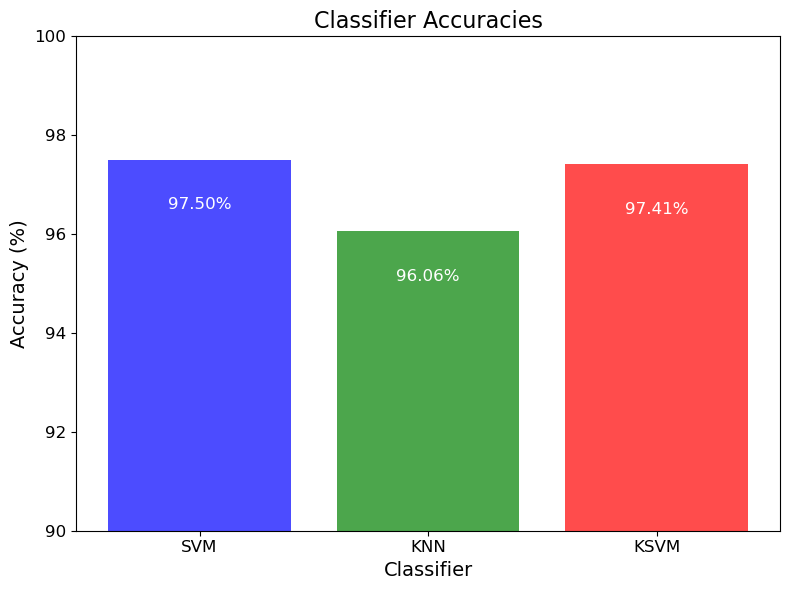

In [8]:
import matplotlib.pyplot as plt

# Classifier names and accuracies (in percentages)
classifiers = ['SVM', 'KNN', 'KSVM']
accuracies = [97.50, 96.06, 97.41]  # Convert to percentages

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'], alpha=0.7)

# Add labels and title
plt.xlabel('Classifier', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Classifier Accuracies', fontsize=16)
plt.ylim(90, 100)  # Set the y-axis range for better visibility
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate the bars with percentage values
for i, acc in enumerate(accuracies):
    plt.text(i, acc - 1, f'{acc:.2f}%', ha='center', fontsize=12, color='white')

# Show the plot
plt.tight_layout()
plt.show()


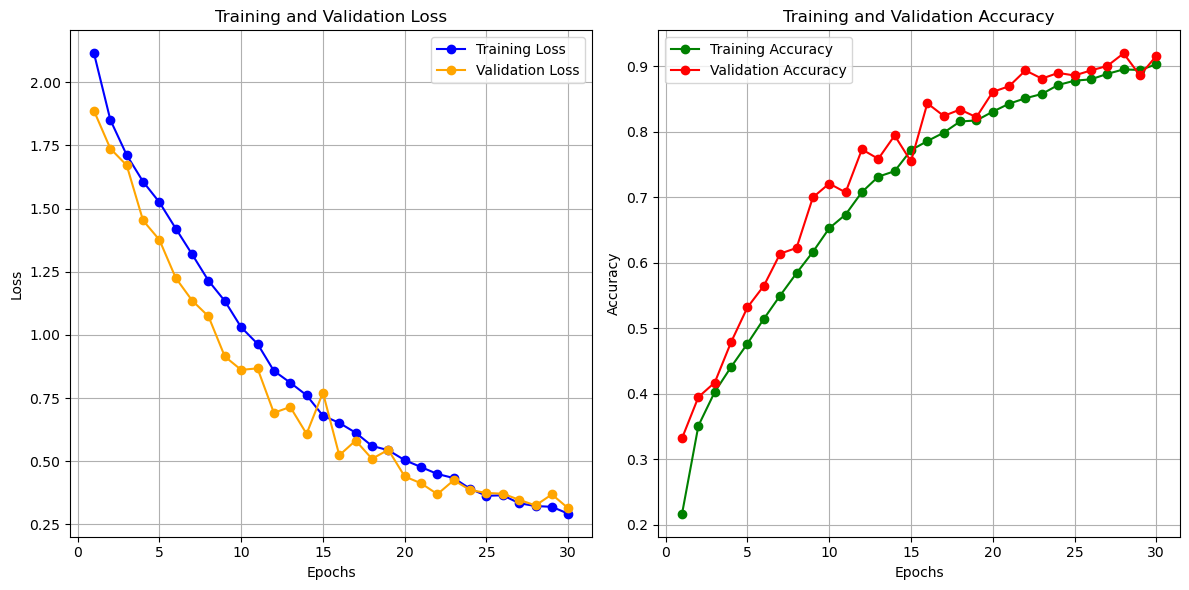

In [6]:
import matplotlib.pyplot as plt

# Training history data
epochs = list(range(1, 31))
train_loss = [
    2.1141, 1.8508, 1.7117, 1.6065, 1.5247, 1.4208, 1.3188, 1.2143, 1.1340, 1.0299, 
    0.9645, 0.8575, 0.8108, 0.7609, 0.6801, 0.6515, 0.6127, 0.5604, 0.5434, 0.5041, 
    0.4767, 0.4493, 0.4332, 0.3907, 0.3630, 0.3650, 0.3336, 0.3224, 0.3194, 0.2921
]
val_loss = [
    1.8866, 1.7372, 1.6711, 1.4528, 1.3760, 1.2251, 1.1359, 1.0733, 0.9143, 0.8614, 
    0.8673, 0.6913, 0.7147, 0.6081, 0.7715, 0.5233, 0.5815, 0.5094, 0.5451, 0.4394, 
    0.4125, 0.3694, 0.4246, 0.3858, 0.3742, 0.3713, 0.3472, 0.3247, 0.3685, 0.3136
]
train_accuracy = [
    0.2166, 0.3510, 0.4026, 0.4408, 0.4765, 0.5142, 0.5499, 0.5841, 0.6165, 0.6527, 
    0.6736, 0.7080, 0.7315, 0.7399, 0.7720, 0.7859, 0.7987, 0.8158, 0.8174, 0.8308, 
    0.8430, 0.8513, 0.8578, 0.8716, 0.8781, 0.8802, 0.8885, 0.8954, 0.8945, 0.9031
]
val_accuracy = [
    0.3320, 0.3948, 0.4170, 0.4788, 0.5319, 0.5647, 0.6139, 0.6226, 0.6998, 0.7210, 
    0.7075, 0.7732, 0.7587, 0.7944, 0.7548, 0.8436, 0.8243, 0.8340, 0.8224, 0.8610, 
    0.8697, 0.8938, 0.8813, 0.8900, 0.8861, 0.8938, 0.9006, 0.9199, 0.8861, 0.9160
]

# Plotting the loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', color='blue', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='green', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='red', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Found 1036 images belonging to 10 classes.
1036/1036 [==============================] - 30s 28ms/step


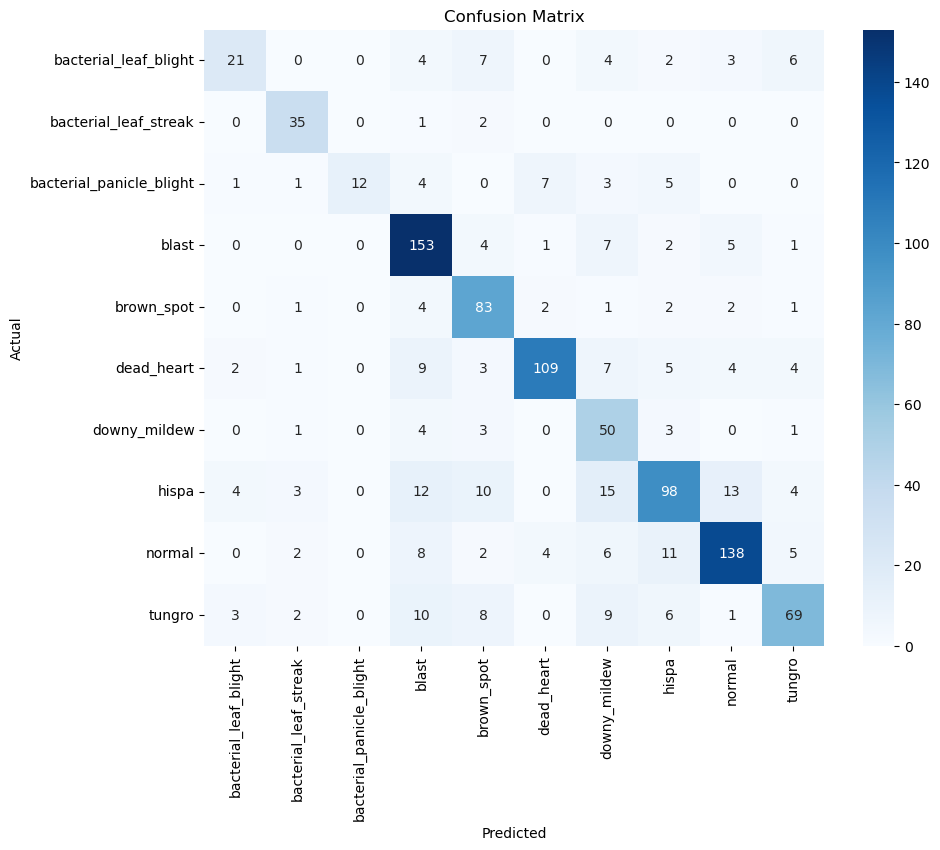


Classification Report:

                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.68      0.45      0.54        47
   bacterial_leaf_streak       0.76      0.92      0.83        38
bacterial_panicle_blight       1.00      0.36      0.53        33
                   blast       0.73      0.88      0.80       173
              brown_spot       0.68      0.86      0.76        96
              dead_heart       0.89      0.76      0.82       144
            downy_mildew       0.49      0.81      0.61        62
                   hispa       0.73      0.62      0.67       159
                  normal       0.83      0.78      0.81       176
                  tungro       0.76      0.64      0.69       108

                accuracy                           0.74      1036
               macro avg       0.75      0.71      0.71      1036
            weighted avg       0.76      0.74      0.74      1036



In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Base Path for all files
data_dir = 'E:/project 1/train_images'

# Define the validation generator
valid_generator = ImageDataGenerator(rescale=1 / 255.0, validation_split=0.1).flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),  # Adjusted to your model input size (e.g., MobileNet size)
    batch_size=1,           # Batch size of 1 for consistent predictions
    subset='validation',
    shuffle=False           # Disable shuffling to align predictions with labels
)

# Load the best model (update the path if needed)
best_model = load_model('./model_38-0.75.h5')  # Replace with the actual model filename

# Generate predictions for all validation samples
predictions = best_model.predict(valid_generator, steps=valid_generator.n, verbose=1)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# True class labels
true_classes = valid_generator.classes

# Class labels
class_labels = list(valid_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Visualization of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optional: Print Classification Report
print("\nClassification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))
